Performing Analysis of Meteorological Data.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

In [64]:
data=pd.read_csv("weatherHistory.csv")

In [65]:
data.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [66]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [67]:
data.isnull().sum(axis = 0)

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [69]:
df=data[['Formatted Date','Apparent Temperature (C)','Humidity','Summary']]
df.head(10)

,Formatted Date,Apparent Temperature (C),Humidity,Summary
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89,Partly Cloudy
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86,Partly Cloudy
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89,Mostly Cloudy
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83,Partly Cloudy
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83,Mostly Cloudy
5,2006-04-01 05:00:00.000 +0200,7.111111,0.85,Partly Cloudy
6,2006-04-01 06:00:00.000 +0200,5.522222,0.95,Partly Cloudy
7,2006-04-01 07:00:00.000 +0200,6.527778,0.89,Partly Cloudy
8,2006-04-01 08:00:00.000 +0200,10.822222,0.82,Partly Cloudy
9,2006-04-01 09:00:00.000 +0200,13.772222,0.72,Partly Cloudy


In [70]:
# get the number of missing data points per column
missing_values_count =df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Formatted Date              0
Apparent Temperature (C)    0
Humidity                    0
Summary                     0
dtype: int64

In [71]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing) 

0.0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Apparent Temperature (C)  96453 non-null  float64
 2   Humidity                  96453 non-null  float64
 3   Summary                   96453 non-null  object 
dtypes: float64(2), object(2)
memory usage: 2.9+ MB


In [82]:
titles_req=['Formatted Date','Apparent Temperature (C)','Humidity','Summary']
df_1=df[titles_req]
df_1.rename({'Apparent Temperature (C)': 'Apparent Temperature'}, axis=1, inplace=True)
df_1['Formatted Date']=pd.to_datetime(df_1['Formatted Date'],utc=True)
df_2= df_1.set_index('Formatted Date')
df_2.resample('M').mean()

,Apparent Temperature,Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,-4.050000,0.890000
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2006-03-31 00:00:00+00:00,1.969780,0.778737
2006-04-30 00:00:00+00:00,12.098827,0.728625
...,...,...
2016-08-31 00:00:00+00:00,21.383094,0.674046
2016-09-30 00:00:00+00:00,18.355833,0.688833
2016-10-31 00:00:00+00:00,8.923947,0.799906


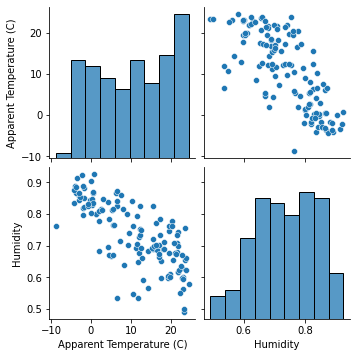

In [83]:
sns.pairplot(df1,kind='scatter')
plt.show()

<Figure size 1440x1440 with 0 Axes>

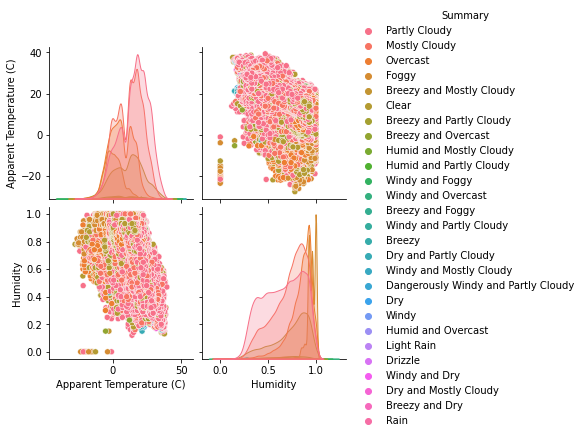

In [92]:
plt.figure(figsize=(20,20))
sns.pairplot(df,hue="Summary") 
plt.show()

<Figure size 1152x432 with 0 Axes>

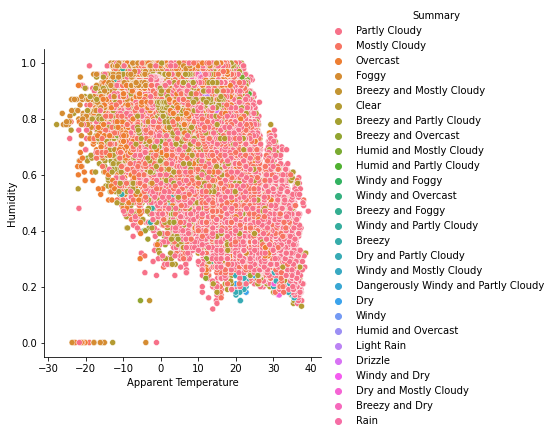

In [112]:
plt.figure(figsize=(16,6))
sns.relplot( x ='Apparent Temperature',y='Humidity',color='purple',hue="Summary" , data=df_2)

In [107]:
df_may=df_2[df_2.index.month==5]
df_may.head()

,Apparent Temperature,Humidity,Summary
Formatted Date,,,
2006-05-31 22:00:00+00:00,6.133333,0.86,Partly Cloudy
2006-05-31 23:00:00+00:00,7.294444,0.86,Partly Cloudy
2006-05-01 00:00:00+00:00,11.133333,0.91,Overcast
2006-05-01 01:00:00+00:00,11.600000,0.62,Mostly Cloudy
2006-05-01 02:00:00+00:00,11.088889,0.71,Mostly Cloudy


<function matplotlib.pyplot.show(close=None, block=None)>

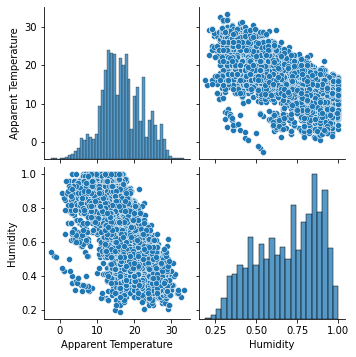

In [108]:
sns.pairplot(df_may,kind='scatter')
plt.show

<Figure size 1152x432 with 0 Axes>

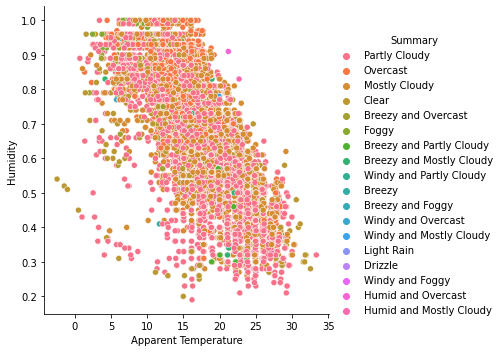

In [109]:
plt.figure(figsize=(16,6))

sns.relplot( x ='Apparent Temperature',y='Humidity',color='purple',hue="Summary" , data=df_may )

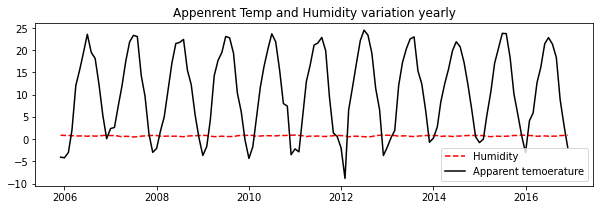

In [88]:
plt.figure(figsize= (10,3))
plt.plot(df1['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(df1['Apparent Temperature (C)'], label = 'Apparent temoerature', color= 'black')
plt.title('Appenrent Temp and Humidity variation yearly')
plt.legend(loc= 0)

In [89]:
a=df1['Apparent Temperature (C)']
b=df1['Humidity']
test=stats.ttest_rel(a,b)
pvalue=test[1]
print(pvalue)

6.686806828886239e-24


In [45]:
if pvalue>0.05:
    print("Accept Null Hypothesis")
else:
    print("Reject Null Hypothesis")

Reject Null Hypothesis


Conclusion

Global warming is deteriorating the climate and is affecting various parameters of the environment. Hence from this analysis, we infer that there is either a sharp rise in temperatures or sharp falls over the 10 yrs. Hence we can conclude that Global Warming has caused a major difference and unreliability in temperature predictability also taking humidity into consideration we can say that it has almost remained the same throughout the past years.